In [57]:
from sdv.tabular import CopulaGAN, GaussianCopula, CTGAN # Synthetic data
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time

For all the experiments, we use Gaussian copula to take those data into account and generate synthetic data, and we see the correlation betweeen the synthetic $x$ and $y$. We all take 1000 "real" data and generate 500 synthetic data.

We will first test a correlation between two columns. We first generate a data with three rows: $x$, $y$, and false_target. the row of $y$ is twice of row $x$ with standard Gaussian noise.

# Linear Correlation of Two Rows

In [47]:
x=np.random.rand(1000)*50

In [48]:
y=x*2+np.random.randn(1000)

Text(0, 0.5, 'artificial y=2x')

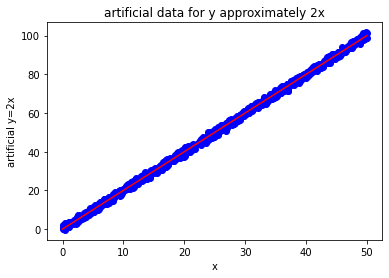

In [49]:
plt.plot(x,y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("artificial data for y approximately 2x")
plt.xlabel("x")
plt.ylabel("artificial y=2x")

In [50]:
false_target=np.random.rand(1000)*10 # a independent additional "target"  column

Text(0.5, 1.0, 'artificial data for x and false_target')

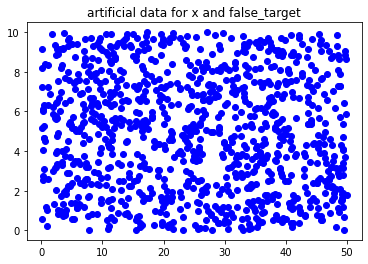

In [51]:
plt.plot(x,false_target,"bo")
plt.title("artificial data for x and false_target")

The false_target does not have any correlation of $x$

In [52]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])

In [53]:
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


In [54]:
synthetic_x=sample["x"]
synthetic_y=sample["y"]

Text(0, 0.5, 'synthetic y=2x')

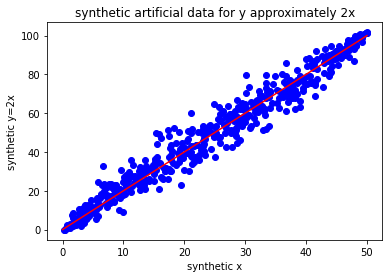

In [55]:
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

(array([21., 27., 26., 26., 23., 28., 26., 26., 23., 24., 25., 30., 24.,
        22., 25., 25., 21., 25., 23., 30.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
        27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. ]),
 <a list of 20 Patch objects>)

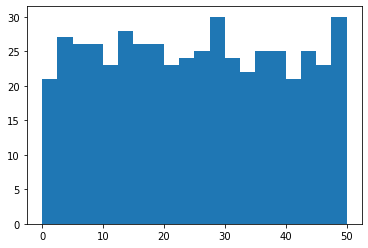

In [56]:
bins = [2.5*i for i in range (0,21)]
plt.hist(synthetic_x, bins)g

In [11]:
MSE = ((synthetic_y-2*synthetic_x)**2).mean() #The mean square error

In [12]:
MSE

19.121838095591777

Comparing to magnitude 50, it is not that large

In [13]:
synthetic_false_target=sample["false_target"]

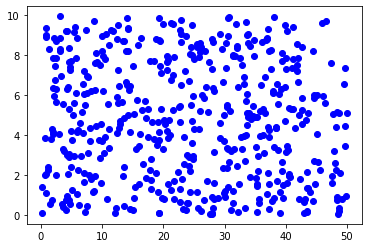

In [14]:
plt.plot(synthetic_x,synthetic_false_target,"bo")

From the graphs we can conclude that it captures somewhat the linear correlation between the columns if they have correlation. 

Now we dive into non-linear correlation.

# Non-linear Correlation of Two Rows
Now we're going to generalize the data of $y=x^2+\varepsilon$ where $x\sim U[-5,5]$ and $\varepsilon \sim \mathcal{N}(0,1)$.

Text(0, 0.5, 'artificial y=x^2')

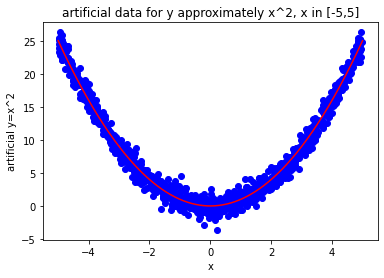

In [15]:
x=np.random.rand(1000)*10-5
y=x**2+np.random.randn(1000)
false_target=np.random.rand(1000)*10
real_x = np.linspace(-5,5,1000)  
real_y = real_x*real_x
plt.plot(x,y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("artificial data for y approximately x^2, x in [-5,5]")
plt.xlabel("x")
plt.ylabel("artificial y=x^2")

Then we generate the synthetic data to check whether it capture this relation.

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Text(0, 0.5, 'synthetic y=x^2')

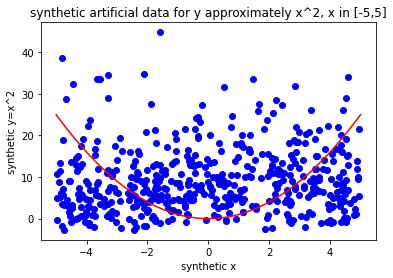

In [16]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("synthetic artificial data for y approximately x^2, x in [-5,5]")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=x^2")

Notice that for quadratic correlation it will not capture the correlation and will not genarate the data along the line of $y=x^2$. 

But we have another guessing: it only captures the the "slope" for the data but looks like linear. So we will generate another example to check this.

Text(0, 0.5, 'artificial y=x^2')

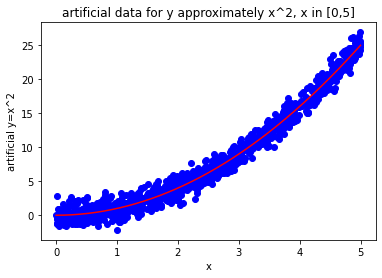

In [58]:
x=np.random.rand(1000)*5
y=x**2+np.random.randn(1000)
false_target=np.random.rand(1000)*10
real_x = np.linspace(0,5,1000)  
real_y = real_x*real_x
plt.plot(x,y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("artificial data for y approximately x^2, x in [0,5]")
plt.xlabel("x")
plt.ylabel("artificial y=x^2")

In [59]:
df = pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
X_reg = df.iloc[:, 0].values.reshape(-1, 1)
Y_reg = df.iloc[:, 1].values.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(X_reg, Y_reg)
Y_pred = linreg.predict(X_reg)

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


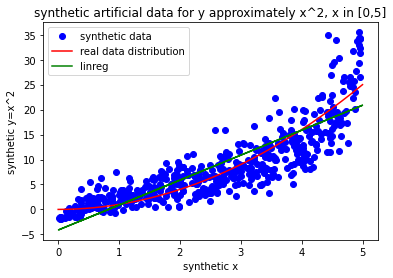

In [61]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo", label = "synthetic data")
plt.plot(real_x,real_y,"r-", label = "real data distribution")
plt.plot(X_reg, Y_pred, "g-", label = "linreg")
plt.title("synthetic artificial data for y approximately x^2, x in [0,5]")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=x^2")
plt.legend(loc=0)

We can see the synthetic $y$ gets larger when $x$ gets larger. However, the growth still looks like linear and does not fit the curve. Also, this does not fit the linear regression line. From the previous graph it is not clear to see, we use another example of cubic function $y=x^3-12x$ below to illustrate this. 

Text(0, 0.5, 'artificial y=x^3-12x')

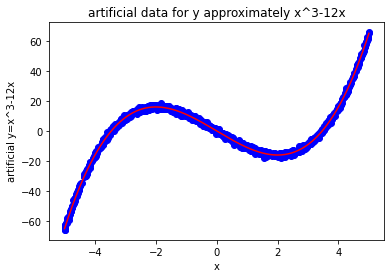

In [29]:
x=np.random.rand(1000)*10-5
y=x**3-12*x+np.random.randn(1000)
false_target=np.random.rand(1000)*10
real_x = np.linspace(-5,5,1000)  
real_y = real_x**3-12*real_x
plt.plot(x,y,"bo")
plt.plot(real_x,real_y,"r-")
plt.title("artificial data for y approximately x^3-12x")
plt.xlabel("x")
plt.ylabel("artificial y=x^3-12x")

In [42]:
df = pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
X_reg = df.iloc[:, 0].values.reshape(-1, 1)
Y_reg = df.iloc[:, 1].values.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(X_reg, Y_reg)
Y_pred = linreg.predict(X_reg)

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


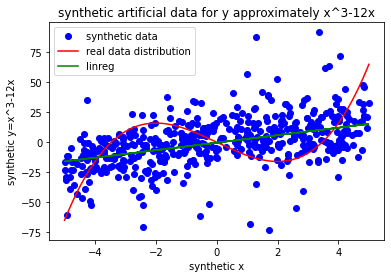

In [43]:
df=pd.DataFrame(pd.DataFrame([x,y,false_target]).values.T,columns = ["x","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo",label = "synthetic data")
plt.plot(real_x,real_y,"r-", label = "real data distribution")
plt.plot(X_reg, Y_pred, "g-", label = "linreg")
plt.title("synthetic artificial data for y approximately x^3-12x")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=x^3-12x")
plt.legend(loc=0)

From the figures above, we can conclude that tt seems that they generate the data along a the linear regression line.

# Linear Correlations for Multiple (4) rows

Text(0, 0.5, 'artificial y')

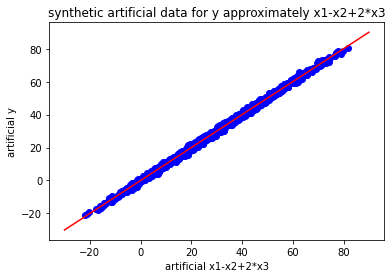

In [21]:
x1=np.random.rand(1000)*30
x2=np.random.rand(1000)*30
x3=np.random.rand(1000)*30
feature_x=x1-x2+2*x3
y=x1-x2+2*x3+np.random.randn(1000)
plt.plot(feature_x,y,"bo")
false_target=np.random.rand(1000)*10
a=[-30,90]; b=[-30,90]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately x1-x2+2*x3")
plt.xlabel("artificial x1-x2+2*x3")
plt.ylabel("artificial y")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Text(0, 0.5, 'synthetic y')

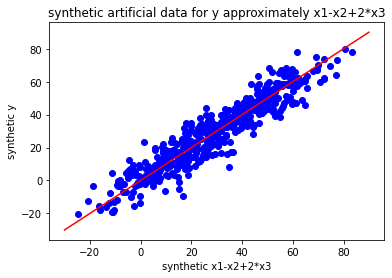

In [22]:
df=pd.DataFrame(pd.DataFrame([x1,x2,x3,y,false_target]).values.T,columns = ["x1","x2","x3","y","false_target"])
model = GaussianCopula()
model.fit(df)
sample = model.sample(num_rows = 500)
synthetic_feature_x=sample["x1"]-sample["x2"]+2*sample["x3"]
synthetic_y=sample["y"]
plt.plot(synthetic_feature_x,synthetic_y,"bo")
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately x1-x2+2*x3")
plt.xlabel("synthetic x1-x2+2*x3")
plt.ylabel("synthetic y")

In [23]:
MSE = ((synthetic_y-synthetic_feature_x)**2).mean() #The mean square error
MSE

53.85738959923752

We can see that it captures the correlation, but the variance is larger.

# Use Other Models of 2 Cols

Text(0, 0.5, 'artificial y=2x')

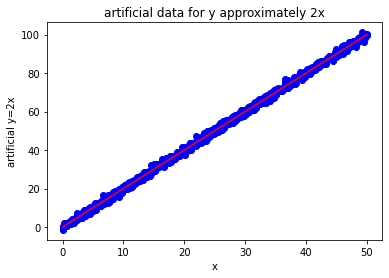

In [114]:
x_1e3=np.random.rand(1000)*50
y_1e3=x_1e3*2+np.random.randn(1000)
plt.plot(x_1e3,y_1e3,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("artificial data for y approximately 2x")
plt.xlabel("x")
plt.ylabel("artificial y=2x")

In [115]:
df_1e3=pd.DataFrame(pd.DataFrame([x_1e3,y_1e3,false_target]).values.T,columns = ["x","y","false_target"])

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (i

Using CopulaGAN uses 42.89134335517883 seconds.


Text(0, 0.5, 'synthetic y=2x')

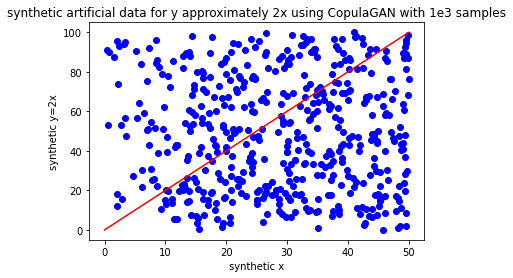

In [116]:
ST=time.time()
model = CopulaGAN()
model.fit(df_1e3)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CopulaGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CopulaGAN with 1e3 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\u

Using CTGAN uses 42.74036502838135 seconds.


Text(0, 0.5, 'synthetic y=2x')

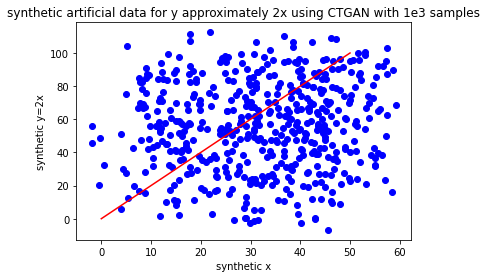

In [117]:
ST=time.time()
model = CTGAN()
model.fit(df_1e3)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CTGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CTGAN with 1e3 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Using GaussianCopula uses 1.3915231227874756 seconds.


Text(0, 0.5, 'synthetic y=2x')

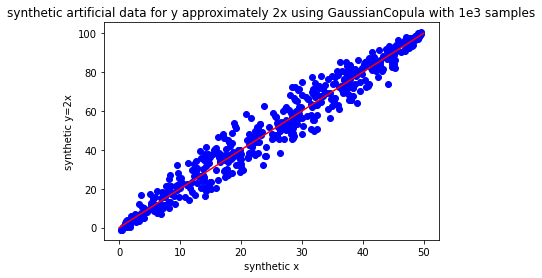

In [118]:
ST=time.time()
model = GaussianCopula()
model.fit(df_1e3)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using GaussianCopula uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using GaussianCopula with 1e3 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

Next are 10000 samples

Text(0, 0.5, 'artificial y=2x')

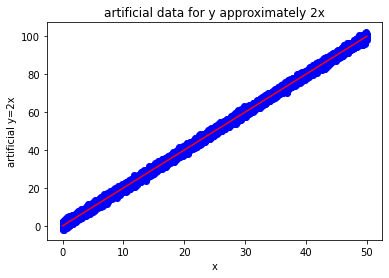

In [119]:
x_1e4=np.random.rand(10000)*50
y_1e4=x_1e4*2+np.random.randn(10000)
plt.plot(x_1e4,y_1e4,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("artificial data for y approximately 2x")
plt.xlabel("x")
plt.ylabel("artificial y=2x")

In [120]:
df_1e4=pd.DataFrame(pd.DataFrame([x_1e4,y_1e4,false_target]).values.T,columns = ["x","y","false_target"])

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\users\1\.julia

Using CopulaGAN uses 438.63762164115906 seconds.


Text(0, 0.5, 'synthetic y=2x')

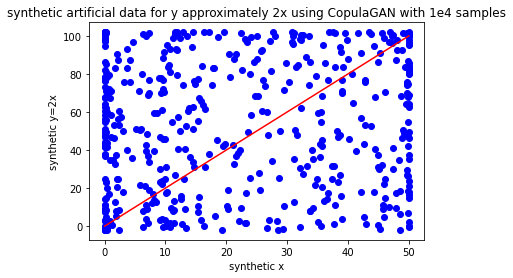

In [121]:
ST=time.time()
model = CopulaGAN()
model.fit(df_1e4)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CopulaGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CopulaGAN with 1e4 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\u

Using CTGAN uses 511.8819377422333 seconds.


Text(0, 0.5, 'synthetic y=2x')

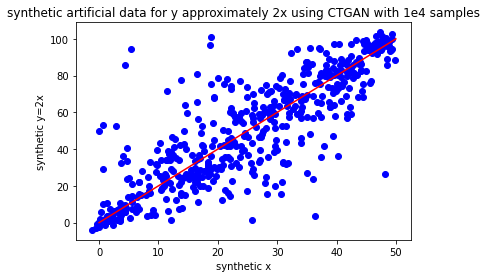

In [122]:
ST=time.time()
model = CTGAN()
model.fit(df_1e4)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CTGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CTGAN with 1e4 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\copulas\univariate\truncated_gaussian.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
c:\users\1\.julia\conda\3\envs\p

Using GaussianCopula uses 7.749960660934448 seconds.


Text(0, 0.5, 'synthetic y=2x')

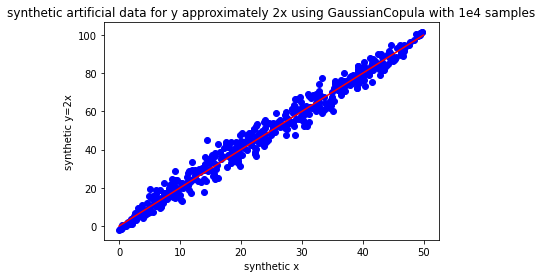

In [123]:
ST=time.time()
model = GaussianCopula()
model.fit(df_1e4)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using GaussianCopula uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using GaussianCopula with 1e4 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

Text(0, 0.5, 'artificial y=2x')

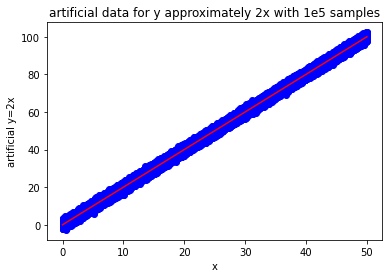

In [124]:
x_1e5=np.random.rand(100000)*50
y_1e5=x_1e5*2+np.random.randn(100000)
plt.plot(x_1e5,y_1e5,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("artificial data for y approximately 2x with 1e5 samples")
plt.xlabel("x")
plt.ylabel("artificial y=2x")

In [129]:
df_1e5=pd.DataFrame(pd.DataFrame([x_1e5,y_1e5,false_target]).values.T,columns = ["x","y","false_target"])

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\users\1\.julia

Using CopulaGAN uses 4436.629347085953 seconds.


Text(0, 0.5, 'synthetic y=2x')

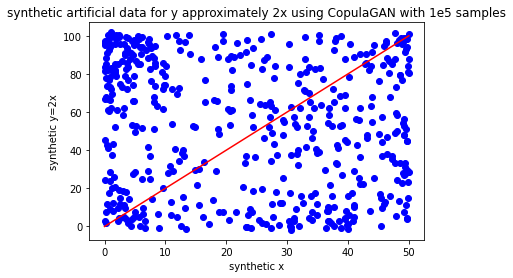

In [130]:
ST=time.time()
model = CopulaGAN()
model.fit(df_1e5)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CopulaGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CopulaGAN with 1e5 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\u

Using CTGAN uses 5915.457293987274 seconds.


Text(0, 0.5, 'synthetic y=2x')

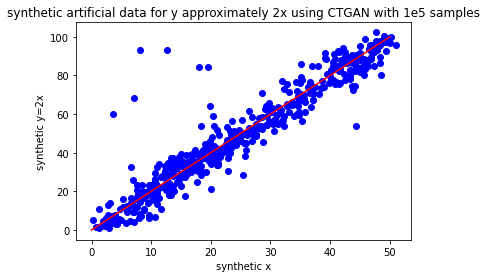

In [131]:
ST=time.time()
model = CTGAN()
model.fit(df_1e5)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CTGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using CTGAN with 1e5 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\copulas\univariate\truncated_gaussian.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
c:\users\1\.julia\conda\3\envs\p

Using GaussianCopula uses 58.01716208457947 seconds.


Text(0, 0.5, 'synthetic y=2x')

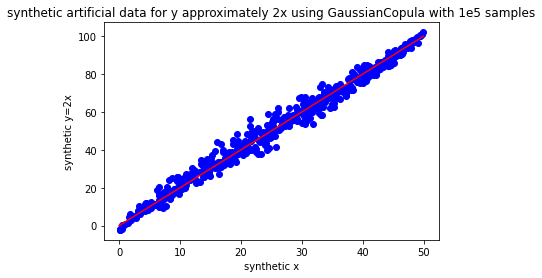

In [132]:
ST=time.time()
model = GaussianCopula()
model.fit(df_1e5)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using GaussianCopula uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
a=[0,50]; b=[0,100]
plt.plot(a,b,"r-")
plt.title("synthetic artificial data for y approximately 2x using GaussianCopula with 1e5 samples")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y=2x")

We can see only the GaussianCopula captures the correlation.

# X-shaped distribution vs uniform
From the paper, we know that it preserved variance and covariance for the distribution.So we could generate two distributions: X-shaped distribution and uniform distribution. And find whether the Gaussian Copula can differ them.

The X-shaped distribution is as follows:

Half of the sample will be $(x,y)=(u+\delta_x,u+\delta_y)$ for $u\sim\mathcal{U}[-5,5]$, $\delta_x,\delta_y\sim\mathcal{N}(0,1)$, and $u,\delta_x,\delta_y$ are i.i.d. The other half of the samples are $(x,y)=(u+\delta_x,-u+\delta_y)$ for $u\sim\mathcal{U}[-5,5]$, $\delta_x,\delta_y\sim\mathcal{N}(0,1)$, and $u,\delta_x,\delta_y$ are i.i.d.

The uniform distribution will be $(x,y)=(u+\delta_x,v+\delta_y)$ for $u,v\sim\mathcal{U}[-5,5]$, $\delta_x,\delta_y\sim\mathcal{N}(0,1)$, and $u,v,\delta_x,\delta_y$ are i.i.d.

Text(0, 0.5, 'synthetic y')

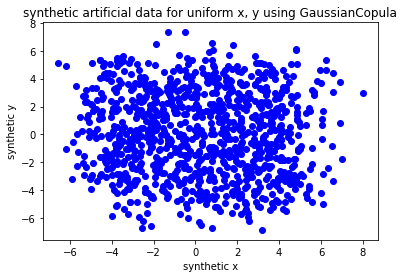

In [81]:
x_unif=np.random.rand(1000)*10-5+np.random.randn(1000)
y_unif=np.random.rand(1000)*10-5+np.random.randn(1000)
df_unif=pd.DataFrame(pd.DataFrame([x_unif,y_unif]).values.T,columns = ["x","y"])
plt.plot(x_unif,y_unif,"bo")
plt.title("synthetic artificial data for uniform x, y using GaussianCopula")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y")

Text(0, 0.5, 'synthetic y')

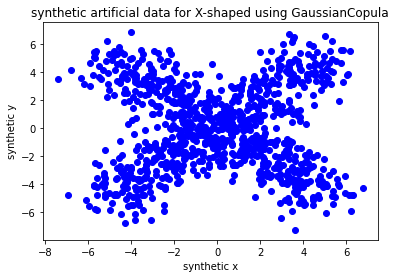

In [82]:
x_pos=np.random.rand(500)*10-5
y_pos=x_pos.copy()
x_pos += np.random.randn(500)
y_pos += np.random.randn(500)
x_neg=np.random.rand(500)*10-5
y_neg=(-x_neg).copy()
x_neg += np.random.randn(500)
y_neg += np.random.randn(500)
x_X=np.concatenate((x_pos,x_neg))
y_X=np.concatenate((y_pos,y_neg))
df_X=pd.DataFrame(pd.DataFrame([x_X,y_X]).values.T,columns = ["x","y"])
plt.plot(x_X, y_X, "bo")
plt.title("synthetic artificial data for X-shaped using GaussianCopula")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y")

We can calculate that the two distributions are with same marginal distribution and same covariance. Now we try to generate the synthetic data.

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Using GaussianCopula uses 0.7898664474487305 seconds.


Text(0, 0.5, 'synthetic y')

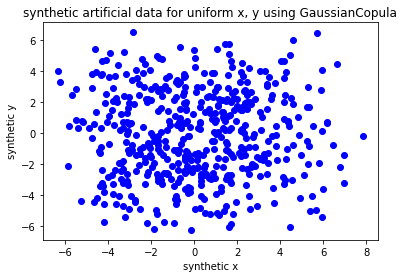

In [83]:
ST=time.time()
model = GaussianCopula()
model.fit(df_unif)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using GaussianCopula uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
plt.title("synthetic artificial data for uniform x, y using GaussianCopula")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Using GaussianCopula uses 0.793813943862915 seconds.


Text(0, 0.5, 'synthetic y')

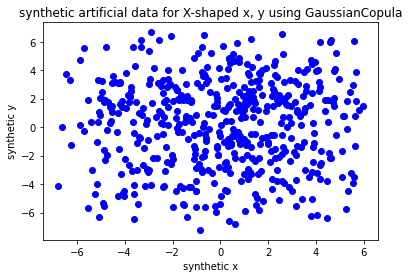

In [84]:
ST=time.time()
model = GaussianCopula()
model.fit(df_X)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using GaussianCopula uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
plt.title("synthetic artificial data for X-shaped x, y using GaussianCopula")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y")

This does not have the X-shape pattern. Therefore, there must be some measure of the distribution and the data is generated by the measure. In other words, the GaussianCopula did not learn the distribution.

Next, we use CTGAN to sample, with 1e4 samples and smaller variance

Text(0, 0.5, 'synthetic y')

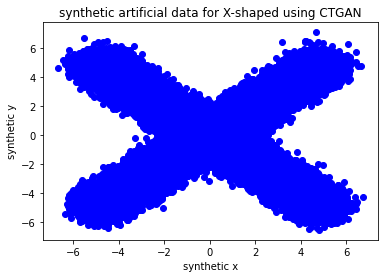

In [142]:
x_pos_1e4 = np.random.rand(50000)*10-5
y_pos_1e4 = x_pos_1e4.copy()
x_pos_1e4 += np.random.randn(50000)*0.5
y_pos_1e4 += np.random.randn(50000)*0.5
x_neg_1e4 = np.random.rand(50000)*10-5
y_neg_1e4 = (-x_neg_1e4).copy()
x_neg_1e4 += np.random.randn(50000)*0.5
y_neg_1e4 += np.random.randn(50000)*0.5
x_X_1e4 = np.concatenate((x_pos_1e4,x_neg_1e4))
y_X_1e4 = np.concatenate((y_pos_1e4,y_neg_1e4))
df_X_1e4 =pd.DataFrame(pd.DataFrame([x_X_1e4,y_X_1e4]).values.T,columns = ["x","y"])
plt.plot(x_X_1e4, y_X_1e4, "bo")
plt.title("artificial data for X-shaped using CTGAN")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y")

c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\1\.julia\conda\3\envs\py36\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Using CTGAN uses 4412.730841636658 seconds.


Text(0, 0.5, 'synthetic y')

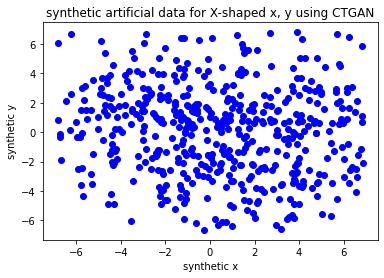

In [143]:
ST=time.time()
model = CTGAN()
model.fit(df_X_1e4)
sample = model.sample(num_rows = 500)
ED=time.time()
print("Using CTGAN uses",ED-ST,"seconds.")
synthetic_x=sample["x"]
synthetic_y=sample["y"]
plt.plot(synthetic_x,synthetic_y,"bo")
plt.title("synthetic artificial data for X-shaped x, y using CTGAN")
plt.xlabel("synthetic x")
plt.ylabel("synthetic y")

# Conclusion
We have several conclusions:
1. Only LINEAR correlations can be detected.
2. We can detect the correct correlations between several columns
3. Only using GaussianCopula we can do the work, but other models seems not.

We have the following guessings:
1. It only generate along the linear model.
2. It may preserve the variances, covariances
3. It may generate the data from a gaussian distribution.